# Flight Price Prediction(EDA + Feature Engineering)

# About Dataset
## INTRODUCTION
The objective of the study is to analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Context:
Predicting the Fare of the flight has never been an easy task.

## Content:
What's inside is more than just rows and columns. Here we have got some collections including the destination to Route, meal included, and much more

In [1]:
# importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
# without plt.show()

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.shape 

(10683, 11)

In [4]:
list(train_df.columns)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [5]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test_df.shape 

(2671, 10)

In [7]:
final_df=train_df.append(test_df)
final_df.head()

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_14704\2632932177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [9]:
final_df.shape 

(13354, 11)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# Fetaure Engineering Process

# 1. Date_of_Journey Column--- Date, Month, Year

In [11]:
final_df['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [12]:
final_df.shape 

(13354, 11)

In [13]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/')

In [14]:
final_df['Date'].head()

0    [24, 03, 2019]
1     [1, 05, 2019]
2     [9, 06, 2019]
3    [12, 05, 2019]
4    [01, 03, 2019]
Name: Date, dtype: object

In [15]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]

In [16]:
final_df['Date'].head()

0    24
1     1
2     9
3    12
4    01
Name: Date, dtype: object

In [17]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [18]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [19]:
final_df["Date"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
final_df["Month"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
final_df["Year"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [20]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [21]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [22]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


# 2. Arrival_Time Column--- Arrival_hour & Arrival_min

In [24]:
final_df['Arrival_Time']

0       01:10 22 Mar
1              13:15
2       04:25 10 Jun
3              23:30
4              21:35
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [25]:
final_df['Arrival_Time'].str.split(' ')

0       [01:10, 22, Mar]
1                [13:15]
2       [04:25, 10, Jun]
3                [23:30]
4                [21:35]
              ...       
2666    [20:25, 07, Jun]
2667             [16:55]
2668    [04:25, 07, Mar]
2669             [19:15]
2670             [19:15]
Name: Arrival_Time, Length: 13354, dtype: object

## we already date so we need only the arrival time

In [26]:
final_df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [27]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [28]:
final_df['Arrival_Time']

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [29]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [30]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [31]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [32]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


# 3. Dept_Time Column--- Dept_hour & Dept_min

In [34]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]

In [35]:
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)

In [36]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [37]:
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


# 4. Total_Stops --- Remove Route Col

In [39]:
list(final_df['Total_Stops'].unique())

['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']

In [40]:
final_df['Total_Stops'].isnull().sum()

1

In [41]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [42]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [43]:
final_df.drop('Route',axis=1,inplace=True)

In [44]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


# 5. Duration

In [46]:
final_df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [47]:
final_df['Duration'].str.split(' ').str[0]

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration, Length: 13354, dtype: object

In [48]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [49]:
final_df['duration_hour']

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: duration_hour, Length: 13354, dtype: object

In [50]:
final_df.shape 

(13354, 15)

In [51]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [52]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [53]:
final_df.shape 

(13351, 15)

In [54]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [55]:
final_df['duration_hour']*60

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: duration_hour, Length: 13351, dtype: int32

In [56]:
final_df['duration_hour'] = final_df['duration_hour']*60

In [57]:
final_df['Duration'].str.split(' ').str[1]

0       50m
1       25m
2       NaN
3       25m
4       45m
       ... 
2666    55m
2667    35m
2668    35m
2669    15m
2670    20m
Name: Duration, Length: 13351, dtype: object

In [58]:
final_df['duration_min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [59]:
final_df['duration_min']

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: duration_min, Length: 13351, dtype: object

In [60]:
final_df['duration_min'].dtype

dtype('O')

In [61]:
final_df['duration_min']=final_df['duration_min'].astype(np.float).astype("Int32")

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_14704\29127689.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final_df['duration_min']=final_df['duration_min'].astype(np.float).astype("Int32")


In [62]:
final_df['duration_min']

0         50
1         25
2       <NA>
3         25
4         45
        ... 
2666      55
2667      35
2668      35
2669      15
2670      20
Name: duration_min, Length: 13351, dtype: Int32

In [63]:
final_df['duration_min'].isnull().sum()

1283

In [64]:
final_df['duration_min']=final_df['duration_min'].fillna(0)

In [65]:
final_df['Duration']=final_df['duration_hour']+final_df['duration_min']

In [66]:
final_df['Duration']

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 13351, dtype: Int32

In [67]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [68]:
#final_df.replace(final_df["Duration"]==final_df["Duration_Mins"])

In [69]:
final_df.rename(columns = {'Duration':'Duration_Mins'}, inplace = True)

In [70]:
final_df.head()

,Airline,Source,Destination,Duration_Mins,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration_Mins    13351 non-null  Int32  
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dept_hour        13351 non-null  int32  
 13  Dept_min         13351 non-null  int32  
 14  duration_hour    13351 non-null  int32  
 15  duration_min     13351 non-null  Int32  
dtypes: Int32(2), float64(2), int32(8), object(4)
memory usage: 

# Categorical Features

In [72]:
list(final_df['Airline'].unique())

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [73]:
list(final_df['Source'].unique())

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

In [74]:
list(final_df['Destination'].unique())

['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

In [75]:
list (final_df['Additional_Info'].unique())

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Short layover',
 'No Info',
 '1 Long layover',
 'Change airports',
 'Business class',
 'Red-eye flight',
 '2 Long layover']

In [76]:
final_df['Additional_Info'].value_counts()

No info                         10490
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

# Label Encoder

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [78]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [79]:
final_df['Airline'].head()

0    3
1    1
2    4
3    3
4    3
Name: Airline, dtype: int32

In [80]:
final_df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [81]:
final_df.shape

(13351, 16)

In [82]:
final_df.head()

,Airline,Source,Destination,Duration_Mins,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
0,3,0,5,170,0.0,8,3897.0,24,3,2019,1,10,22,20,120,50
1,1,3,0,445,2.0,8,7662.0,1,5,2019,13,15,5,50,420,25
2,4,2,1,1140,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,0
3,3,3,0,325,1.0,8,6218.0,12,5,2019,23,30,18,5,300,25
4,3,0,5,285,1.0,8,13302.0,1,3,2019,21,35,16,50,240,45


In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Duration_Mins    13351 non-null  Int32  
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  int32  
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dept_hour        13351 non-null  int32  
 13  Dept_min         13351 non-null  int32  
 14  duration_hour    13351 non-null  int32  
 15  duration_min     13351 non-null  Int32  
dtypes: Int32(2), float64(2), int32(12)
memory usage: 1.0 MB


In [84]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration_Mins         0
Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
duration_hour         0
duration_min          0
dtype: int64

In [85]:
final_df.dropna(inplace=True)

In [86]:
final_df.shape

(10680, 16)

In [87]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Duration_Mins      0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dept_hour          0
Dept_min           0
duration_hour      0
duration_min       0
dtype: int64

# One Hot Encoder

In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [89]:
pd.get_dummies(final_df['Airline'])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [90]:
pd.get_dummies(final_df['Source'])

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [91]:
pd.get_dummies(final_df['Destination'])

,0,1,2,3,4,5
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [92]:
pd.get_dummies(final_df['Additional_Info'])

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,1,0
10679,0,0,0,0,0,0,0,0,1,0
10680,0,0,0,0,0,0,0,0,1,0
10681,0,0,0,0,0,0,0,0,1,0


In [93]:
final_df=pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [94]:
final_df.head()

,Duration_Mins,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,170,0.0,8,3897.0,24,3,2019,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,445,2.0,8,7662.0,1,5,2019,13,15,5,...,0,0,0,1,0,0,0,0,0,0
2,1140,2.0,8,13882.0,9,6,2019,4,25,9,...,0,0,1,0,0,1,0,0,0,0
3,325,1.0,8,6218.0,12,5,2019,23,30,18,...,0,0,0,1,0,0,0,0,0,0
4,285,1.0,8,13302.0,1,3,2019,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [95]:
final_df.shape 

(10680, 33)

In [96]:
X = final_df.drop(columns=['Price'], axis=1)
y = final_df.Price

# Split Train Test

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [98]:
seed=42
 
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.30,random_state=seed)

# Random Forest Classfier

In [99]:
from sklearn.ensemble import RandomForestRegressor as rf

In [100]:
model=rf(n_estimators=20, random_state=12,max_depth=5)
model.fit(X_train, y_train)
print(model)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12)


In [101]:
y_pr = model.predict(X_test)
print(y_pr)
print(y_test)
#f=metrics.accuracy_score(y_test, y_pr)*100
#print("Accuracy:",f)
#print("Accuracy:",metrics.accuracy_score(y_ts, y_pr)*100)

[10308.06329685  9413.24258959 11882.13878646 ...  8059.2570079
  5414.3003756  14152.92924377]
[15058.  7832. 14424. ...  4227.  8040. 16655.]


In [102]:
train_score_rf = model.score(X_train, y_train)
test_score_rf = model.score(X_test, y_test)

prediction_rf = model.predict(X_test)
mae_rf = round(mean_absolute_error(y_test, prediction_rf))

print("Decision Tree:")
print("Training MAE score:", round(train_score_rf, 2))
print("Test MAE score:", round(test_score_rf, 2))
print("Test MAE score:", mae_rf)


Decision Tree:
Training MAE score: 0.74
Test MAE score: 0.76
Test MAE score: 1549


# Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeRegressor as dt

In [104]:
model=dt()
model.fit(X_train, y_train)
print(model)

DecisionTreeRegressor()


In [105]:
y_pr = model.predict(X_test)
print(y_pr)
print(y_test)

[14848.  7832. 14109. ...  7893.  8040. 16840.]
[15058.  7832. 14424. ...  4227.  8040. 16655.]


In [106]:
train_score_dt = model.score(X_train, y_train)
test_score_dt = model.score(X_test, y_test)

prediction_dt = model.predict(X_test)
mae_dt = round(mean_absolute_error(y_test, prediction_dt))

print("Decision Tree:")
print("Training MAE score:", round(train_score_dt, 2))
print("Test MAE score:", round(test_score_dt, 2))
print("Test MAE score:", mae_dt)

Decision Tree:
Training MAE score: 1.0
Test MAE score: 0.83
Test MAE score: 806


# XGBRegressor

In [107]:
from xgboost import XGBRegressor

In [108]:
model=XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [109]:
y_pr = model.predict(X_test)
print(y_pr)
print(y_test)

[14460.153   7319.3    13907.413  ...  5903.757   7408.2407 16978.553 ]
[15058.  7832. 14424. ...  4227.  8040. 16655.]


In [110]:
train_score_xgb = model.score(X_train, y_train)
test_score_xgb = model.score(X_test, y_test)

prediction_xgb = model.predict(X_test)
mae_xgb = round(mean_absolute_error(y_test, prediction_xgb))

print("XGBRegressor")
print("Training MAE score:", round(train_score_xgb, 2))
print("Test MAE score:", round(test_score_xgb, 2))
print("Test MAE score:", mae_xgb)

XGBRegressor
Training MAE score: 0.97
Test MAE score: 0.92
Test MAE score: 764


In [111]:
train_score_rf

0.7401697662228316

In [112]:
import pandas as pd

# Define a custom style function
def simple_style(val):
    return 'background-color: lightblue'

# Create the models_score DataFrame
models_score = pd.DataFrame({
    'Train Score': [train_score_rf, train_score_xgb, train_score_dt],
    'Test Score': [test_score_rf, test_score_xgb, test_score_dt],
    'MAE': [mae_rf, mae_xgb, mae_dt]
}, index=['Random forest', 'XGBoost', 'Decision tree'])

# Apply the custom style to the DataFrame
styled_models_score = models_score.style.applymap(simple_style)

# Display the styled DataFrame
styled_models_score

,Train Score,Test Score,MAE
Random forest,0.740170,0.759310,1549
XGBoost,0.972540,0.919167,764
Decision tree,0.996298,0.827685,806


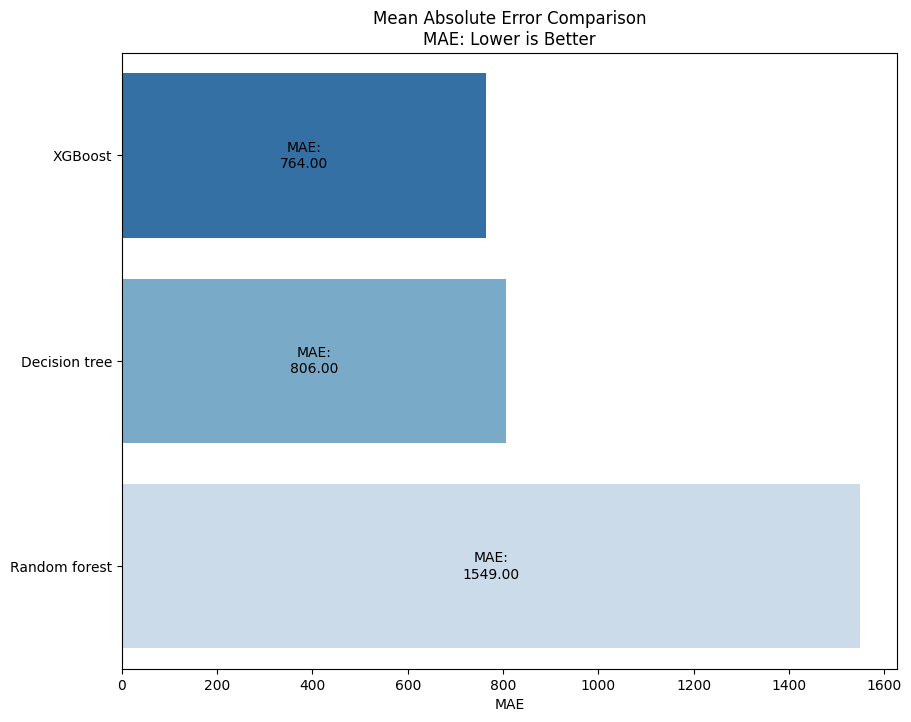

In [113]:
fig, ax = plt.subplots(figsize=(10, 8))

models_score_sorted = models_score.sort_values('MAE')
sns.barplot(x='MAE', y=models_score_sorted.index,data=models_score_sorted, palette='Blues_r');

# add the annotation
ax.bar_label(ax.containers[-1], fmt='MAE:\n%.2f', label_type='center')

plt.title('Mean Absolute Error Comparison\nMAE: Lower is Better')
#plt.suptitle('Lower is Better')
plt.show()

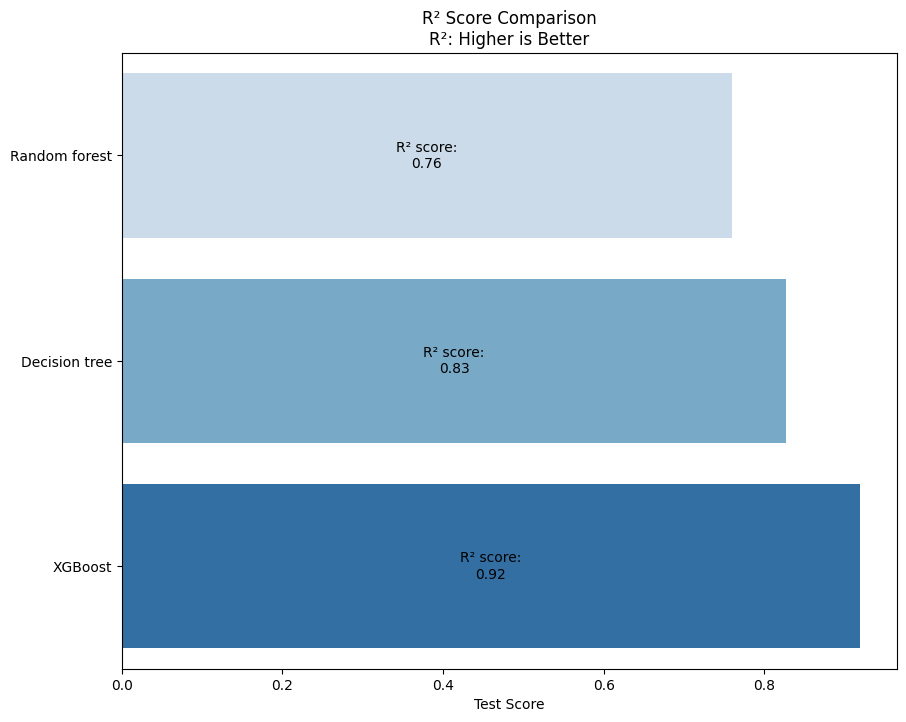

In [114]:
fig, ax = plt.subplots(figsize=(10, 8))

models_score_sorted = models_score.sort_values('Test Score')

sns.barplot(x='Test Score', y=models_score_sorted.index,data=models_score_sorted, palette='Blues');

# add the annotation
ax.bar_label(ax.containers[-1], fmt='R² score:\n%.2f', label_type='center')

plt.title('R² Score Comparison\nR²: Higher is Better')
#plt.suptitle('Lower is Better')
plt.show()

#### At the end I decided to use the XGBoost Model for the better Mean Absolute Error and  best R².

# Research Questions
The aim of our study is to answer the below research questions:
1. Does price vary with Airlines?

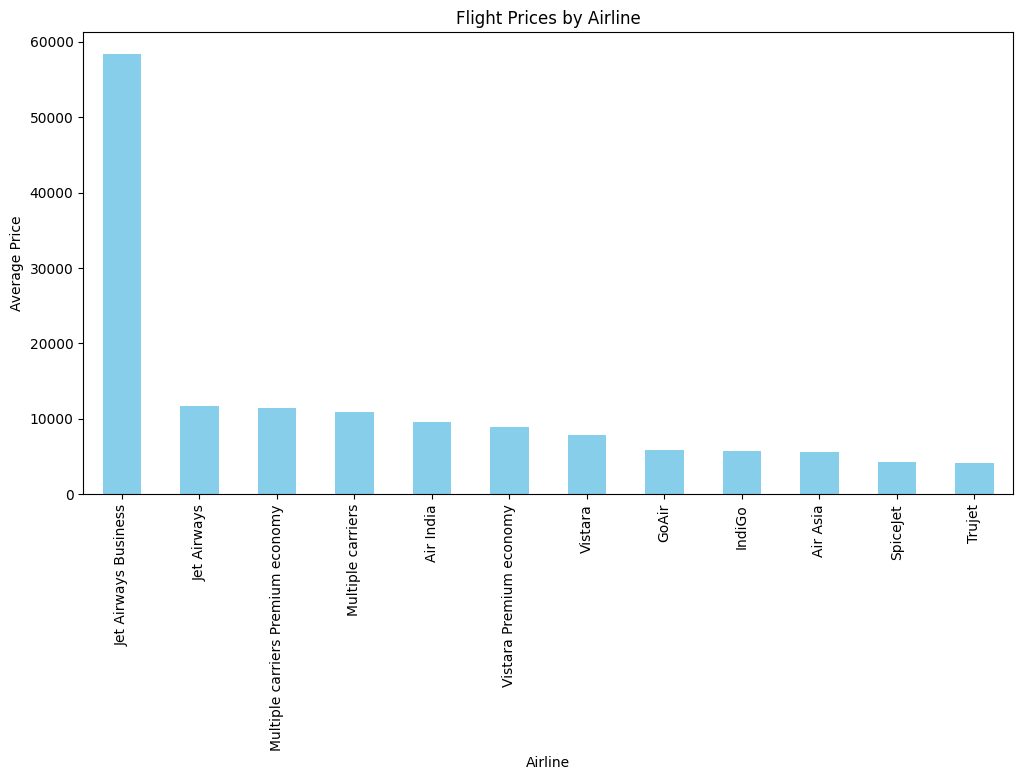

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with the given columns
# Let's assume your DataFrame is named 'flight_data'

# Create a bar plot to visualize the relationship between airlines and prices
plt.figure(figsize=(12, 6))
train_df.groupby('Airline')['Price'].mean().sort_values(ascending=False).plot(kind='bar',color="skyblue")
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


## 2. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [116]:
# Extract the 'Date_of_Journey' column and convert it to a datetime object
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y')

# Calculate the number of days before departure
train_df['Days_Before_Departure'] = (train_df['Date_of_Journey'] - pd.to_datetime('today')).dt.days

# Filter data for tickets bought 1 and 2 days before departure
last_two_days_data = train_df[train_df['Days_Before_Departure'].between(1, 2)]

if not last_two_days_data.empty:
    # Calculate the average ticket price for each case
    average_prices = last_two_days_data.groupby('Days_Before_Departure')['Price'].mean()

    # Create a line plot to visualize the average ticket prices
    plt.figure(figsize=(8, 6))
    average_prices.plot(kind='line', color='skyblue', marker='o', linestyle='-')
    plt.title('Average Ticket Prices for Tickets Bought 1-2 Days Before Departure')
    plt.xlabel('Days Before Departure')
    plt.ylabel('Average Price')
    plt.grid()
    plt.show()
else:
    print("No data available for tickets bought 1-2 days before departure.")


No data available for tickets bought 1-2 days before departure.


## 3. Does ticket price change based on the departure time and arrival time?

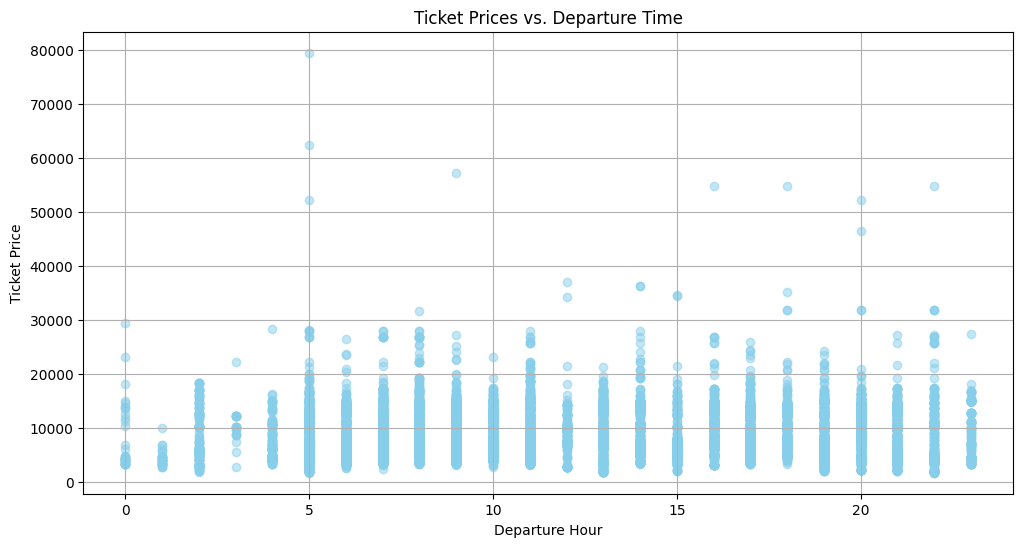

In [117]:
# Assuming you have a DataFrame with the given columns
# Let's assume your DataFrame is named 'train_df'

# Extract the 'Dep_Time' column and convert it to a datetime object
train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])

# Extract the hour of the departure time
train_df['Dep_Hour'] = train_df['Dep_Time'].dt.hour

# Create a scatter plot to visualize the relationship between departure time and ticket prices
plt.figure(figsize=(12, 6))
plt.scatter(train_df['Dep_Hour'], train_df['Price'], c='skyblue', alpha=0.5)
plt.title('Ticket Prices vs. Departure Time')
plt.xlabel('Departure Hour')
plt.ylabel('Ticket Price')
plt.grid()
plt.show()


## 4. How the price changes with change in Source and Destination?

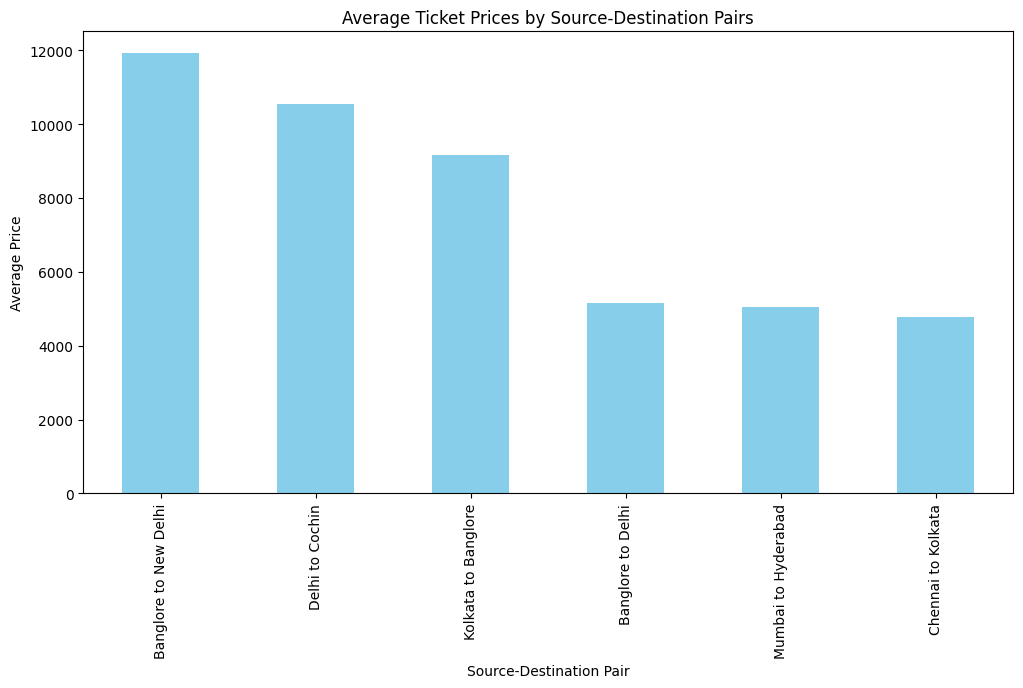

In [118]:
# Create a bar plot to visualize the relationship between source-destination pairs and prices
plt.figure(figsize=(12, 6))
train_df['Source_Destination'] = train_df['Source'] + ' to ' + train_df['Destination']
average_prices = train_df.groupby('Source_Destination')['Price'].mean().sort_values(ascending=False)
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Ticket Prices by Source-Destination Pairs')
plt.xlabel('Source-Destination Pair')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()
